<H2>Intoduction</H2>

Link to the Kaggle competition: https://www.kaggle.com/c/noaa-right-whale-recognition
The training data can be found at the above link.

The objective is to identify the North Atlantic Right whales from aerial photographs through machine learning. This is required to keep track of this endangered species and support conservation efforts. Experienced marine biologists can identify these whales by sight but new hires have to flip all previous images of the whales and compare them with the whale that has been sighted.

How to identify a Right whale?

Each Right whale has a unique callosity pattern on the head. Callosities are hardened skin that appears white.

http://www.neaq.org/education_and_activities/games_and_activities/online_games/right_whale_identification_games.php
The above is an interactive game that teaches how to identify Right whales.

This problem involves two stages:

1. Location or detecting the whale in the photo
2. Recognizing the whale

For the detection stage the following approaches have been used:

Contour Detection

The open source computer vision library, opencv, offers a method to detect edges in an image. A contour is a line drawn to connect continuous points. In most of the photographs, the whale's body creates an edge around it as it rises out of the water. The opencv findContours method accomplishes this. It outputs a list of arrays, each array being a contour.

In [ ]:
import cv2

# Read image
src = cv2.imread("C:\\Users\\harini\\Pictures\\w_0.jpg", cv2.CV_LOAD_IMAGE_GRAYSCALE)

# Set threshold and maxValue
thresh =150
maxValue = 255

# Basic threshold example
th, dst = cv2.threshold(src, thresh, maxValue, cv2.THRESH_BINARY);
print(th,maxValue)
#cv2.imshow("Contour",dst)
#cv2.waitKey(0)
# Find Contours
countours,hierarchy=cv2.findContours(dst,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# Draw Contour
cv2.drawContours(dst,countours,-1,(255,255,255),-1)

cv2.imshow("Contour",dst)
cv2.waitKey(0)

Surface Detection

The second method we tried out is surface detection. The whales body has distinct pixel values and creates an edge around it. The opencv SURF method accomplished this.

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('C:\\Users\\harini\\Pictures\\w_0.jpg',0)

surf = cv2.SURF(5000)

# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)
print(len(kp))

# Check present Hessian threshold
print surf.hessianThreshold

img2 = cv2.drawKeypoints(img,kp,None,(255,0,0),4)
plt.imshow(img2),plt.show()

Histogram Similarity

The last method we tried was to compare the histograms of various parts of the image. The parts with the most different histograms generally contain the whale. 

(array([  1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   1.10000000e+01,
          1.80000000e+01,   1.60000000e+01,   2.20000000e+01,
          0.00000000e+00,   2.90000000e+01,   4.60000000e+01,
          5.50000000e+01,   7.40000000e+01,   8.90000000e+01,
          1.16000000e+02,   9.60000000e+01,   1.17000000e+02,
          1.18000000e+02,   1.09000000e+02,   1.25000000e+02,
          0.00000000e+00,   1.32000000e+02,   1.33000000e+02,
          1.06000000e+02,   1.28000000e+02,   1.23000000e+02,
          1.21000000e+02,   1.17000000e+02,   1.13000000e+02,
          1.10000000e+02,   1.06000000e+02,   1.09000000e+02,
          0.00000000e+00,   1.14000000e+02,   1.35000000e+02,
          1.17000000e+02,   1.33000000e+02,   1.19000000e+02,
          1.52000000e+02,   1.33000000e+02,   1.43000000e+02,
          1.34000000e+02,   1.52000000e+02,   1.84000000e+02,
        

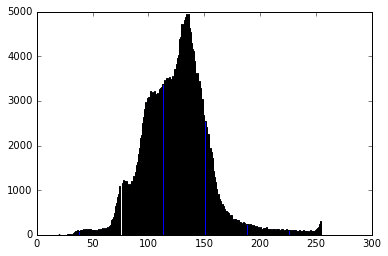

In [11]:
%matplotlib inline
import os
src1=cv2.imread(os.path.expanduser('~/RightWhale/opencv-haar-classifier-training/positive_images/w_3.jpg'),cv2.CV_LOAD_IMAGE_GRAYSCALE)
src2=cv2.imread(os.path.expanduser('~/RightWhale/opencv-haar-classifier-training/negative_images/n_w_3.jpg'),cv2.CV_LOAD_IMAGE_GRAYSCALE)

plt.hist(src1.flatten(), bins=256)

(array([  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   1.40000000e+01,   2.70000000e+01,
          5.60000000e+01,   0.00000000e+00,   8.20000000e+01,
          1.39000000e+02,   0.00000000e+00,   2.32000000e+02,
          3.55000000e+02,   5.03000000e+02,   0.00000000e+00,
          6.46000000e+02,   8.72000000e+02,   0.00000000e+00,
          1.05100000e+03,   1.33400000e+03,   1.68500000e+03,
          0.00000000e+00,   1.89300000e+03,   2.12200000e+03,
          0.00000000e+00,   2.31400000e+03,   2.45700000e+03,
          2.67200000e+03,   0.00000000e+00,   2.85300000e+03,
          2.86400000e+03,   0.00000000e+00,   2.98300000e+03,
          3.03100000e+03,   3.17700000e+03,   0.00000000e+00,
          3.36300000e+03,   3.36300000e+03,   0.00000000e+00,
          3.40000000e+03,   3.50100000e+03,   0.00000000e+00,
          3.48900000e+03,   3.54900000e+03,   3.64100000e+03,
        

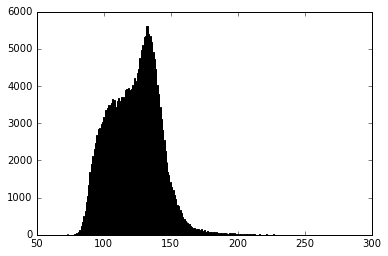

In [12]:
plt.hist(src2.flatten(), bins=256)

Opencv Haar Classifier

Opencv has an inbuilt method to extract haar like features. The following has been adapted from:

http://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html

For the negative images the below script was used to get pictures of just the water.

In [ ]:
import os
import numpy as np
from pandas.io.parsers import read_csv
import cv2


def load_image( infilename ) :
    #size=(600,400)
    src=cv2.imread(os.path.expanduser('~/RightWhale/imgs/'+infilename))
    cropped_image = src[0:400,0:600]
    cv2.imwrite(os.path.expanduser('~/RightWhale/Negative_Images/n_rev_'+infilename),cropped_image)
    src=None

FTRAIN = '~/RightWhale/train.csv'

def load():
    fname = FTEST if test else FTRAIN
    df = read_csv(os.path.expanduser(fname))  # loadsthe training data csv

    df['Image'].apply(load_image) #Applies the slicing function to create the images of just the water

load()

After creating the samples using the tutorial, the following must be used in a bash or cmd shell to train the cascade. This step takes days on a regular computer, just as the author points out.

opencv_traincascade -data classifier -vec samples.vec -bg negatives.txt\
  -numStages 20 -minHitRate 0.999 -maxFalseAlarmRate 0.5 -numPos 1000\
  -numNeg 600 -w 80 -h 40 -mode ALL -precalcValBufSize 1024\
  -precalcIdxBufSize 1024
  
The output is an xml file that has location information of the various haar features.

The output from one of the above methods is fed into a convolutional neural network.

The following has been adapted from 
http://danielnouri.org/notes/2014/12/17/using-convolutional-neural-nets-to-detect-facial-keypoints-tutorial/#second-model-convolutions

A CNN with 12 layer:

In [ ]:
import os
import numpy as np
from pandas.io.parsers import read_csv
from matplotlib import pyplot
import cv2
import cPickle as pickle
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import BatchIterator
import theano

def convertY(str):
    out=str.split("_")
    return int(out[1])

def load_image( infilename ) :
    size=(96,96)
    src=cv2.imread(os.path.expanduser('~/RightWhale/imgs/'+infilename),cv2.CV_LOAD_IMAGE_GRAYSCALE)
    resized_image = cv2.resize(src, size)
    return resized_image.flatten()
    
fname = '~/RightWhale/train.csv'

def load():
    df = read_csv(os.path.expanduser(fname))
    df['Image'] = df['Image'].apply(load_image)


    X = 1.0*np.vstack(df['Image'].values) / 255  # scale pixel values to [0, 1]
    X = X.astype(np.float32)

    y = df['whaleID'].values
    for i in range(len(y)):
        y[i] = convertY(y[i])
    y=y.astype(np.float32)
    y=y.reshape(-1,1)
    return X, y

def load2d():
    X, y = load()
    X = X.reshape(-1, 1, 96, 96)
    return X, y

def float32(k):
    return np.cast['float32'](k)

class AdjustVariable(object):
    def __init__(self, name, start=0.03, stop=0.001):
        self.name = name
        self.start, self.stop = start, stop
        self.ls = None

    def __call__(self, nn, train_history):
        if self.ls is None:
            self.ls = np.linspace(self.start, self.stop, nn.max_epochs)

        epoch = train_history[-1]['epoch']
        new_value = float32(self.ls[epoch - 1])
        getattr(nn, self.name).set_value(new_value)



net = NeuralNet(
    layers=[
        ('input', layers.InputLayer),
        ('conv1', layers.Conv2DLayer),
        ('pool1', layers.MaxPool2DLayer),
        ('dropout1', layers.DropoutLayer),  # !
        ('conv2', layers.Conv2DLayer),
        ('pool2', layers.MaxPool2DLayer),
        ('dropout2', layers.DropoutLayer),  # !
        ('conv3', layers.Conv2DLayer),
        ('pool3', layers.MaxPool2DLayer),
        ('dropout3', layers.DropoutLayer),  # !
        ('hidden4', layers.DenseLayer),
        ('dropout4', layers.DropoutLayer),  # !
        ('hidden5', layers.DenseLayer),
        ('output', layers.DenseLayer),
        ],
    input_shape=(None, 1, 96, 96),
    conv1_num_filters=32, conv1_filter_size=(3, 3), pool1_pool_size=(2, 2),
    dropout1_p=0.1,  # !
    conv2_num_filters=64, conv2_filter_size=(2, 2), pool2_pool_size=(2, 2),
    dropout2_p=0.2,  # !
    conv3_num_filters=128, conv3_filter_size=(2, 2), pool3_pool_size=(2, 2),
    dropout3_p=0.3,  # !
    hidden4_num_units=1000,
    dropout4_p=0.5,  # !
    hidden5_num_units=1000,
    output_num_units=1, output_nonlinearity=None,

    update_learning_rate=theano.shared(float32(0.03)),
    update_momentum=theano.shared(float32(0.9)),

    regression=True,
    on_epoch_finished=[
        AdjustVariable('update_learning_rate', start=0.03, stop=0.0001),
        AdjustVariable('update_momentum', start=0.9, stop=0.999),
        ],
    max_epochs=10000,
    verbose=1,
    )

def main():
    X, y = load2d()
    net.fit(X, y)
    
    with open('net.pickle', 'wb') as f:
        pickle.dump(net, f, -1)

main()